In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import nrrd
import numpy as np
import pandas as pd

from skimage import measure

import csv
import os

In [13]:
def trim(arr, mask):
    bounding_box = tuple(
        slice(np.min(indexes), np.max(indexes) + 1)
        for indexes in np.where(mask))
    return arr[bounding_box]

In [14]:
data, _ = nrrd.read('048_pect_phfirst_013114_wholeLungVesselParticles_height_0_6_ctSigma_1_0.nrrd')

data = trim(data, data != 0)

In [15]:
space_conversion = 0.62540192926045013 * 10e-3

verts, faces, _, _ = measure.marching_cubes(data, 0)
surfaceArea = measure.mesh_surface_area(verts, faces) * (space_conversion**2)

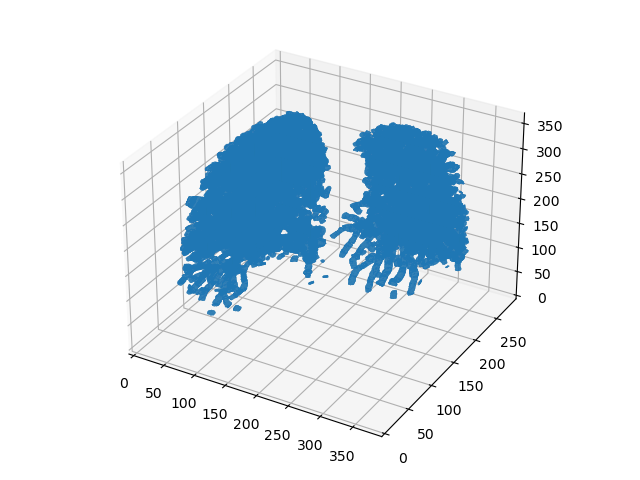

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)

ax.set_xlim(0, np.shape(data)[0])
ax.set_ylim(0, np.shape(data)[1])
ax.set_zlim(0, np.shape(data)[2])

plt.tight_layout()
plt.show()